# Graphs

## Graph Terminologies
**Degree of a Vertex:** The total number of edges incident on a vertex. There are two types of degrees:

**In-Degree:** The total number of incoming edges of a vertex.

**Out-Degree:** The total number of outgoing edges of a vertex.

**Parallel Edges:** Two undirected edges are parallel if they have the same end vertices. Two directed edges are parallel if they have the same starting and ending vertices.

**Self Loop:** This occurs when an edge starts and ends on the same vertex.

**Adjacency:** Two vertices are said to be adjacent if there is an edge connecting them directly.



There are two common types of graphs:

1. Undirected
2. Directed

The two most common ways to represent a graph are:

1. Adjacency Matrix
2. Adjacency List

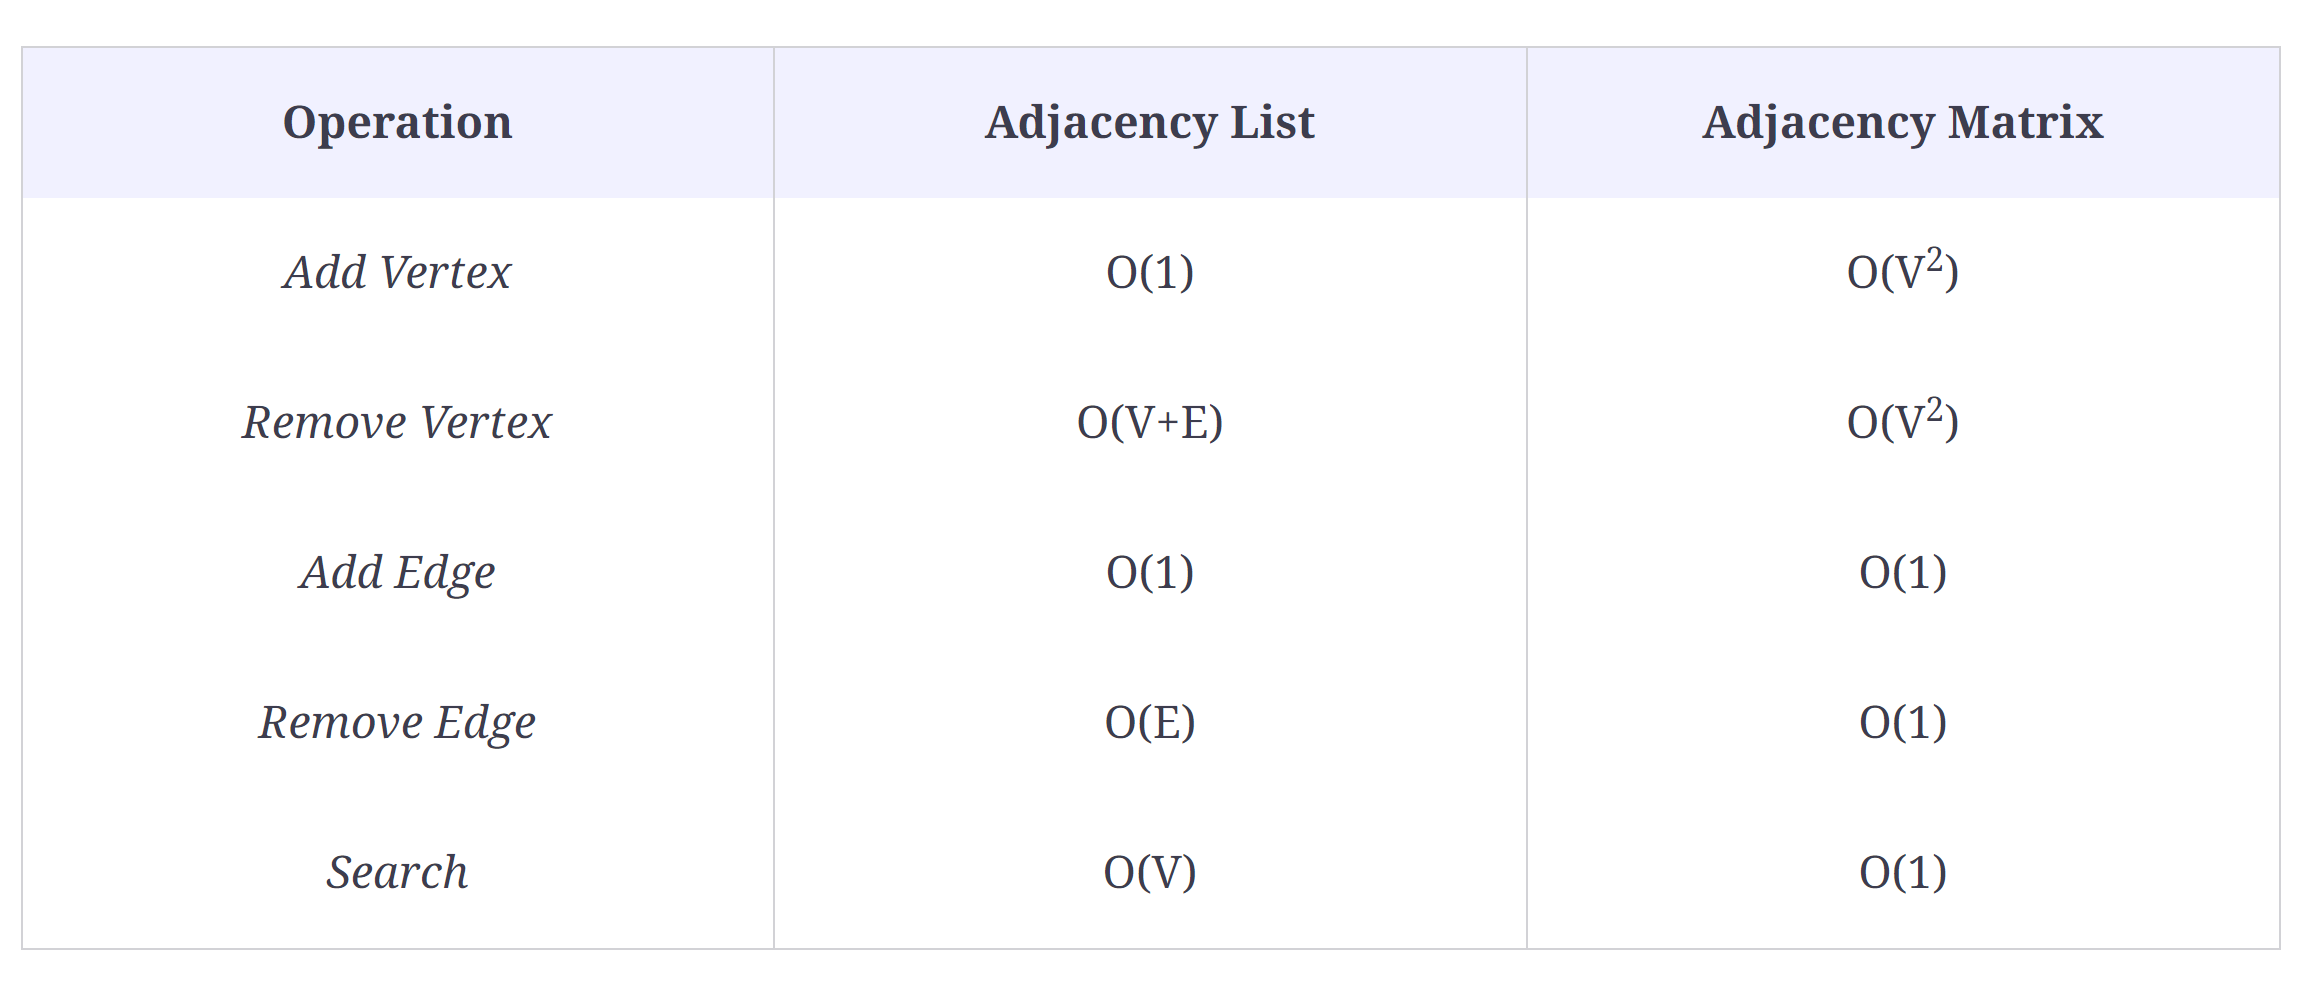

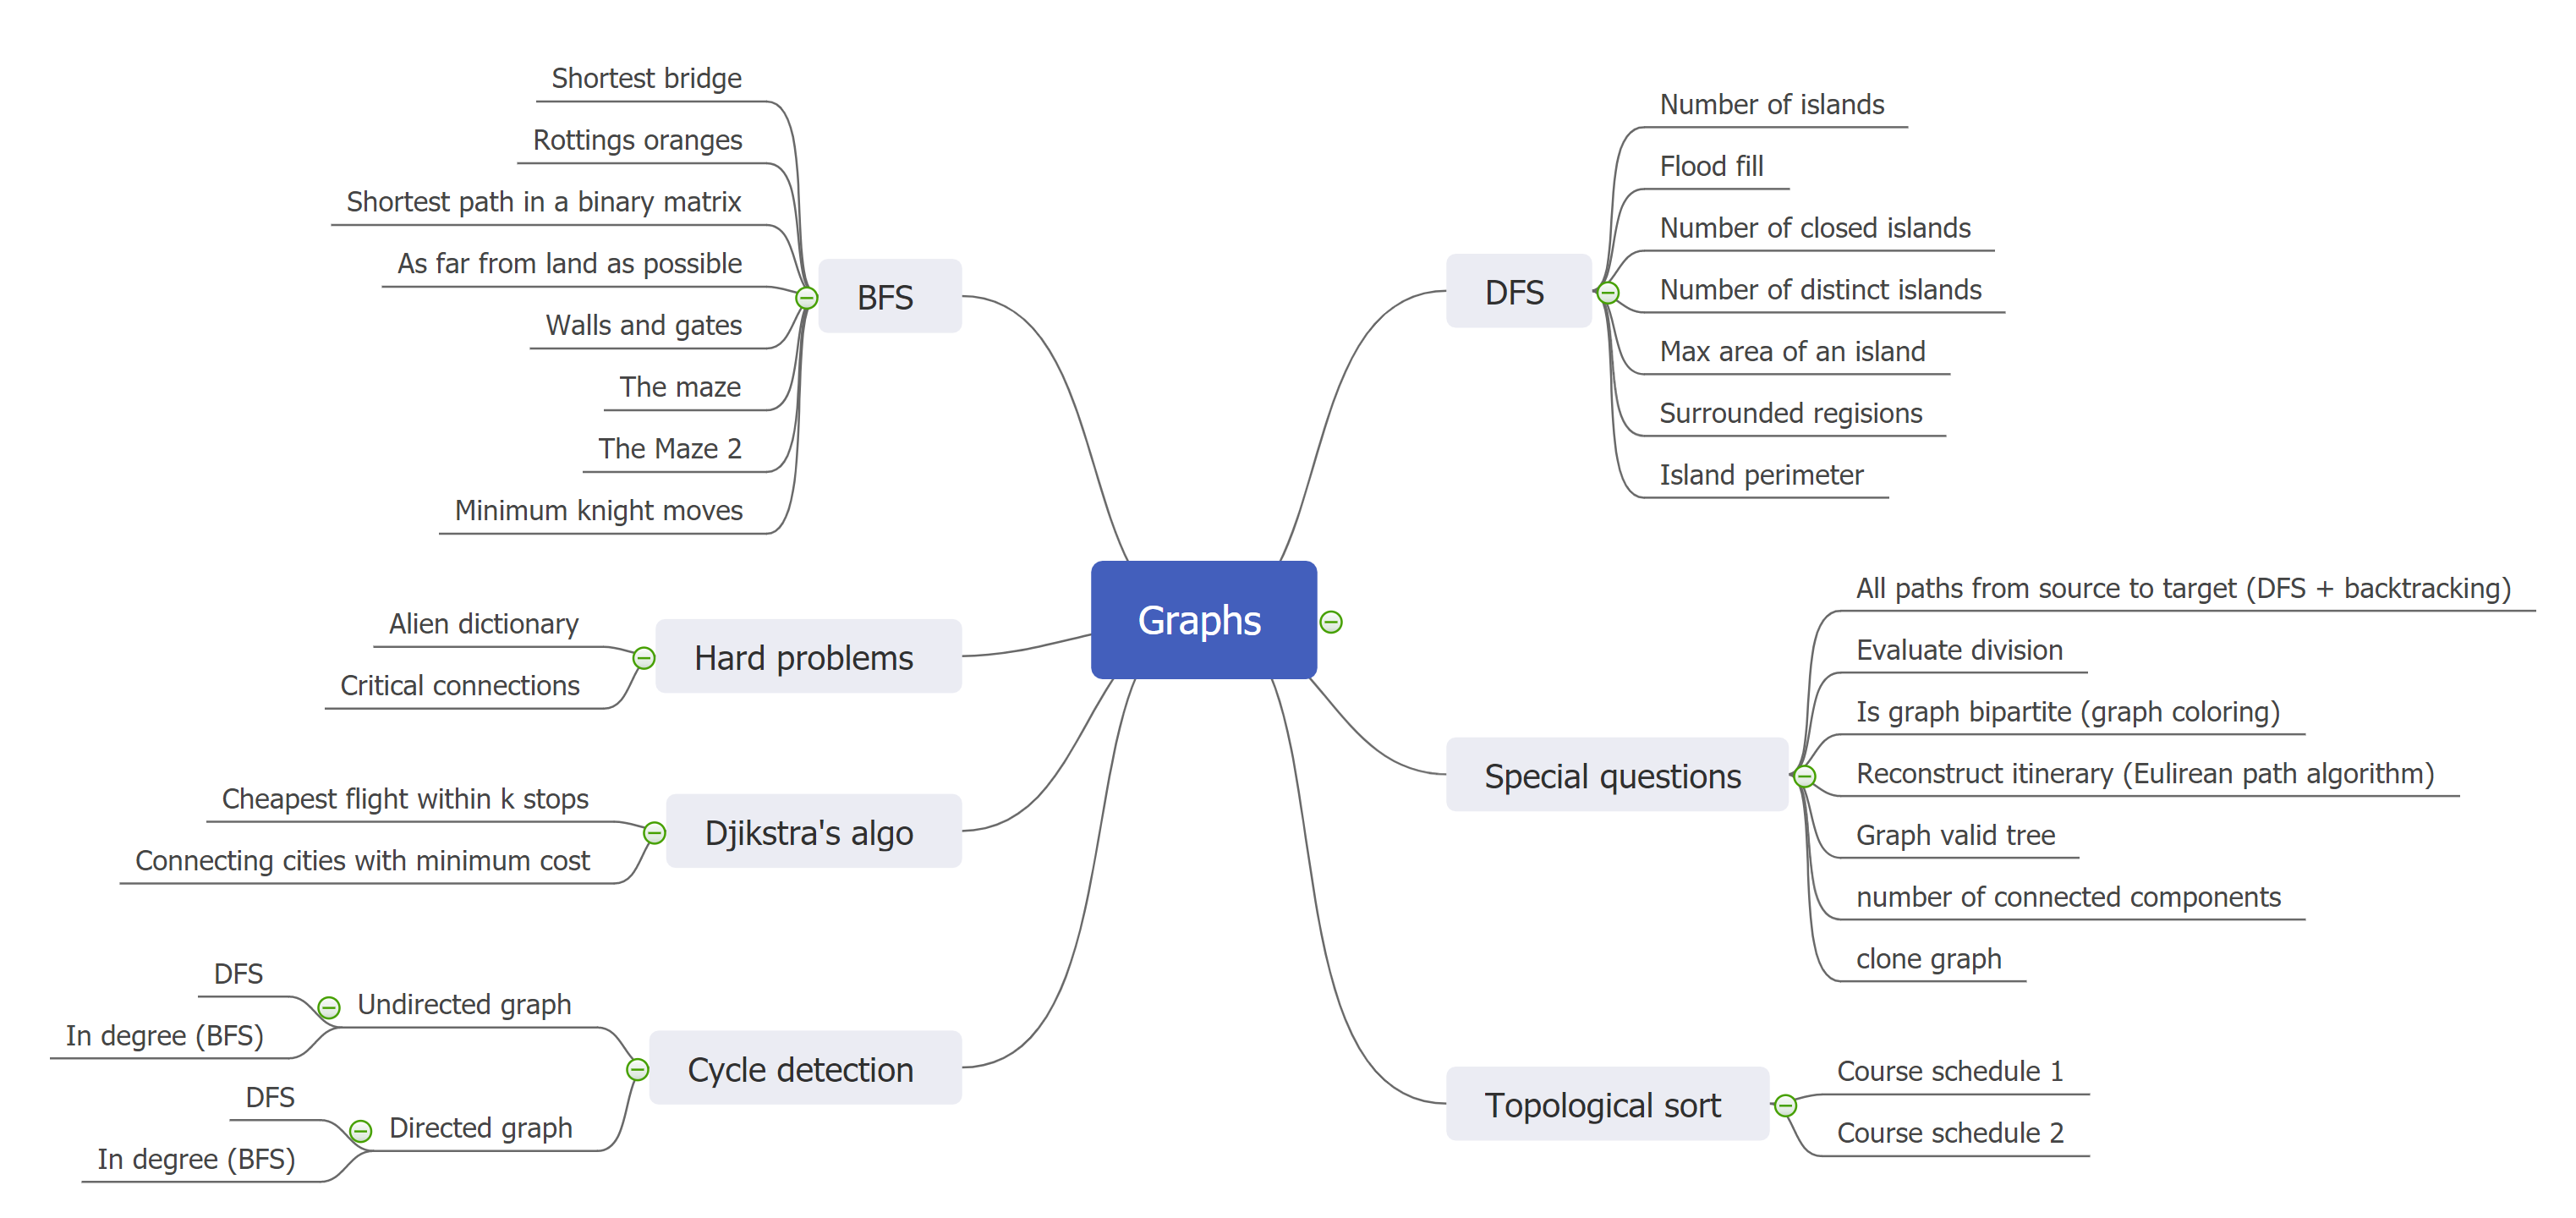

## Graph traversal algorithms

1. Breadth First Search (BFS)
2. Depth First Search (DFS)

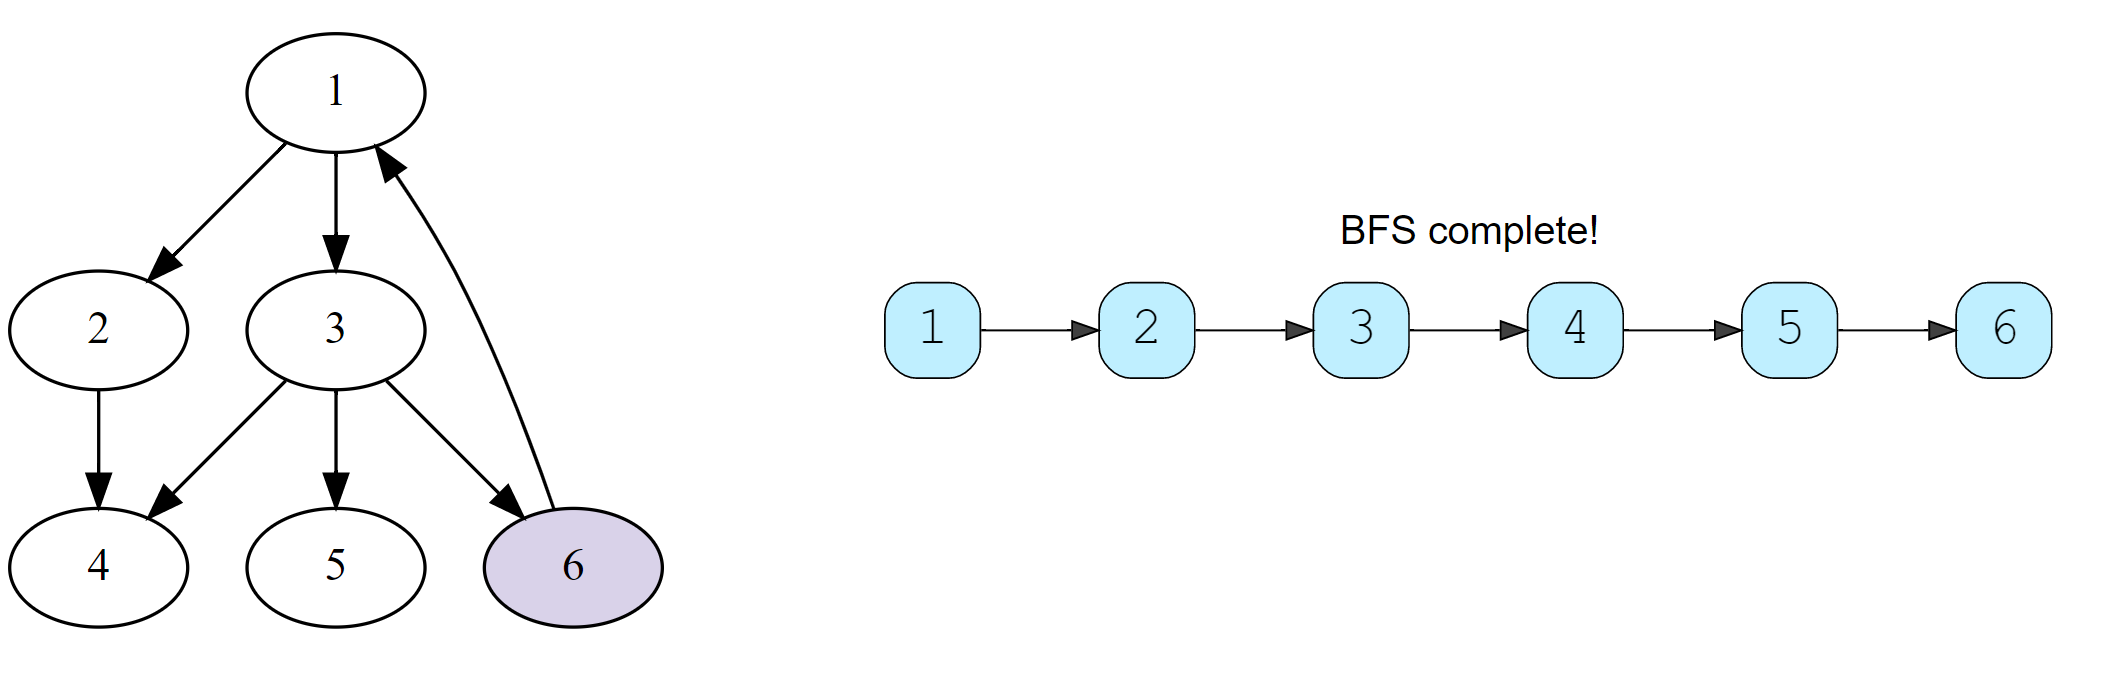

**DFS**

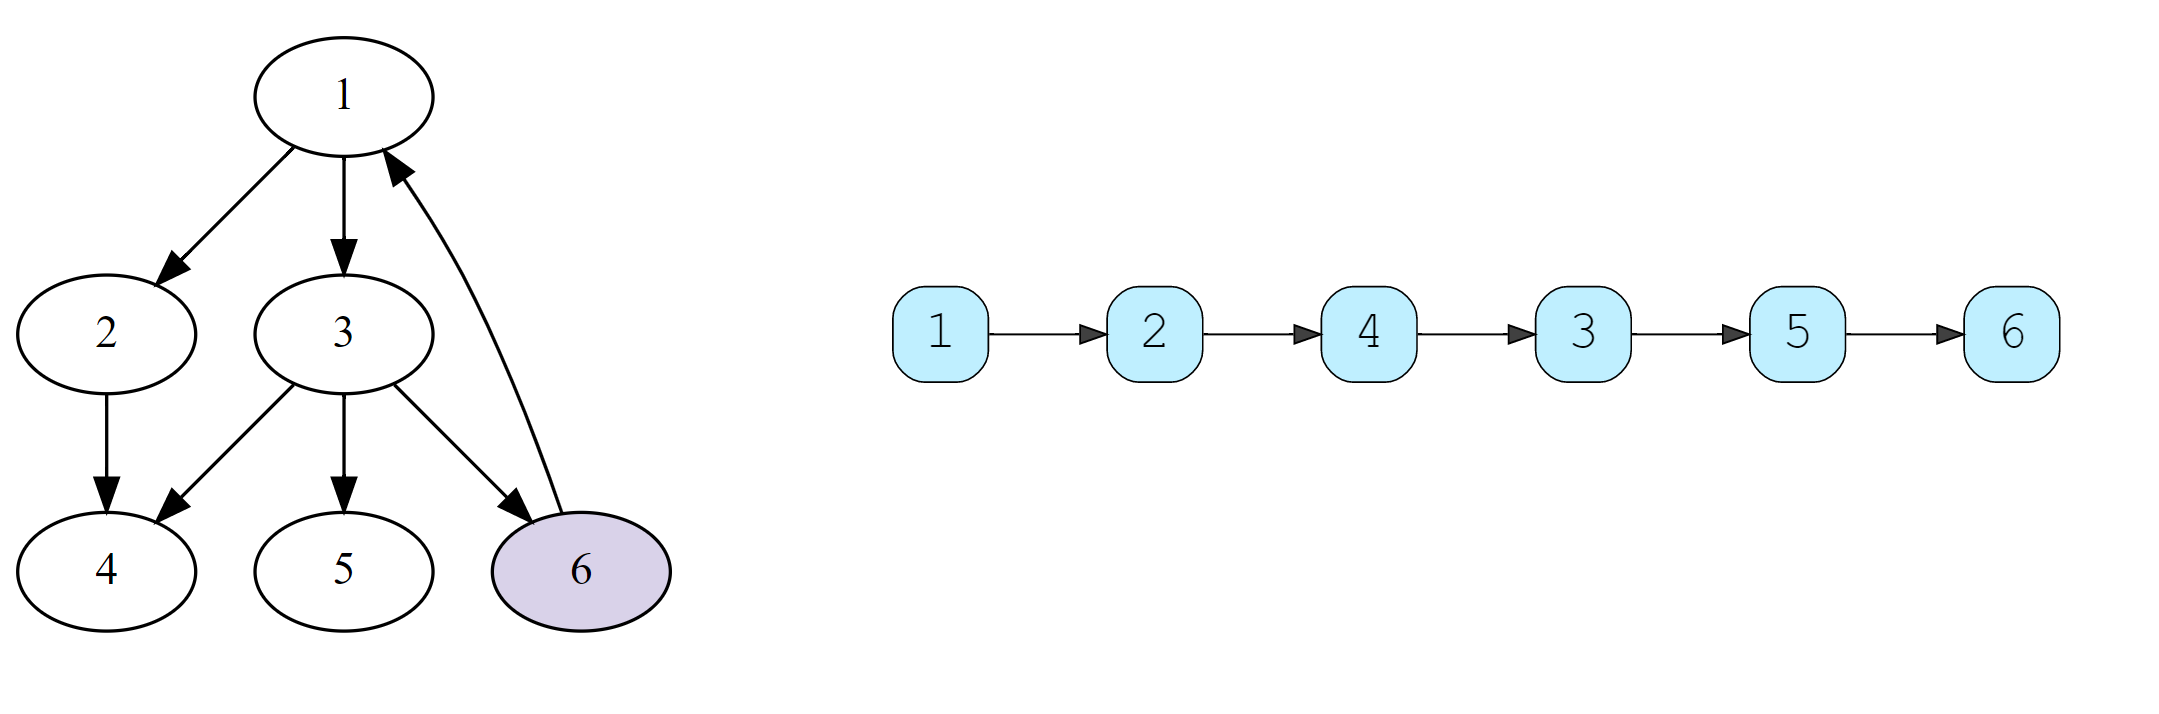

### BFS implementation

In [3]:
import collections
'''
Breadth first search for a directed graph
'''
from collections import defaultdict

class Graph:
    def __init__(self):
        self.graph = defaultdict(list)

    def addEdge(self,u,v):
        self.graph[u].append(v)

    def BFS(self,start_node):
        # initialize visited list
        visited = set()

        # For BFS, queue is used
        queue = collections.deque()

        # 1. Add to queue and mark the node as visited
        queue.append(start_node)
        visited.add(start_node)

        while queue:
            node = queue.popleft() # O(N). Instead can use deque() which makes it O(1)
            
            # add vertices which are edges to start node(2)
            for nei in self.graph[node]:
                if nei not in visited:
                    queue.append(nei)
                    visited.add(nei)


g = Graph()
g.addEdge(0, 1)
g.addEdge(0, 2)
g.addEdge(1, 2)
g.addEdge(2, 0)
g.addEdge(2, 3)
# g.addEdge(3, 3)
g.BFS(2)


### DFS implementation

In [3]:
'''
Depth first search for a directed graph
For an undirected graph, you'll add a reverse edge
self.graph[v].append(u) at line 14
'''
from collections import defaultdict

class Graph:
    def __init__(self):
        self.graph = defaultdict(list)

    def addEdge(self,u,v):
        self.graph[u].append(v)

    # 1. Visit one vertex, go to one of its adjacent vertex and then repeat
    def DFS(self,s):
        visited = set()
        
        self.DFS_helper(s, visited)

    def DFS_helper(self, v, visited):
        print(v)
        visited.add(v)
        
        for i in self.graph[v]:
            if i not in visited:
                self.DFS_helper(i, visited)

g = Graph()
g.addEdge(0, 1)
g.addEdge(0, 2)
g.addEdge(1, 2)
g.addEdge(2, 0)
g.addEdge(2, 3)
# g.addEdge(3, 3)

g.DFS(1)


1
2
0
3


## DFS

### [Number of Islands](https://leetcode.com/problems/number-of-islands/)

In [ ]:
'''
Approach: DFS 
Time complexity : O(MN) where M is the number of rows and N is the number of columns.

Space complexity : worst case O(M N) in case that the grid map is filled with lands where DFS goes by M×N deep
'''
class Solution:
    def numIslands(self, grid: List[List[str]]) -> int:
        if not grid:
            return 0
        def dfs(grid, i,j):
            # out of bounds and when there is no land - func return
            if i < 0 or i >= len(grid) or j < 0 or j >= len(grid[0]) or grid[i][j] != '1':
                return
            
            # change the value to any str so you dont go into recursive loop / visited idea can also be used 
            # -- Two ways to keep track of a cell grid[i][j] which is traversed.
            grid[i][j] = '#'
            # visited.add((i,j))
            
            # move in 4 directions and call dfs on its neighboring cells.
            for x,y in directions:
                dfs(grid, i+x, j+y)
       
        row = len(grid)
        col = len(grid[0])
        directions  = [[0,1],[1,0],[-1,0],[0,-1]]
#         visited = set()
        # One dfs call will give you one island 
        island_count = 0
        for i in range(row):
            for j in range(col):
                if grid[i][j] == '1':
                    dfs(grid, i , j)
                    island_count += 1
        return island_count     

### [Number of distinct islands](https://leetcode.com/problems/number-of-distinct-islands/)

In [ ]:
'''
Idea: To map any island to the coordinates to same space in the left top corner [(0,0),(0,1), (1,0),(1,1)]
'''


class Solution:
    def numDistinctIslands(self, grid: List[List[int]]) -> int:
        # base case:
        if not grid:
            return 0
        
        def dfs(grid, i, j, p, q):
            # out of bounds and when there is no land - func return
            if i < 0 or i >= row or j < 0 or j >= col or grid[i][j] != 1:
                return
            # Visited node values are changed
            grid[i][j] = 0
            
            self.path.append((i + p, j + q))
            
            # print(self.path)
            # Move into 4 directions
            for x,y in directions:
                dfs(grid, i+x, j+y, p, q)
        

        distinct = set()
        row = len(grid)
        col = len(grid[0])
        directions  = [[0,1],[1,0],[-1,0],[0,-1]]
        
        for i in range(len(grid)):
            for j in range(len(grid[0])):
                self.path = [] # for every island store the co-ords
                if grid[i][j] == 1:
                    dfs(grid, i, j, -i, -j)
                    # tuple bcoz a list cannot be hashed to store in a set. 
                    distinct.add(tuple(self.path))

        return len(distinct)

    

### [Flood fill](https://leetcode.com/problems/flood-fill)

In [ ]:
'''
Approach: DFS, Similar to Number of islands - instead of calling dfs on multiple 1s by looping through the matrix
DFS() is perfomed on one cell image[sr][sc] 
Time complexity : O(MN) where M is the number of rows and N is the number of columns.
Space complexity : worst case O(M N) in case that the grid map is filled with lands where DFS goes by M×N deep
'''

class Solution:
    def floodFill(self, image: List[List[int]], sr: int, sc: int, newColor: int):
        # base case when the new color is same as the old color.
        if image[sr][sc] == newColor:
            return image

        def dfs(image, i,j):
            # out of bounds and when the cell has a different color - func return
            if i < 0 or i >= row or j < 0 or j >= col or image[i][j] != color:
                return

            # update the color
            image[i][j] = newColor
            
            # move in 4 directions
            for x,y in directions:
                dfs(image, i+x, j+y)


        
        row = len(image)
        col = len(image[0])
        directions  = [[0,1],[1,0],[-1,0],[0,-1]]
        
        # get the color of the starting cell and check the color of its adjacent cells
        # and update their color to the new color
        color = image[sr][sc]

        dfs(image, sr, sc)

        return image


### [Max area of an island](https://leetcode.com/problems/max-area-of-island)

In [ ]:
'''
Approach: Same as number of islands
Count the number of dfs calls inside a dfs call. 
Time complexity : O(MN) where M is the number of rows and N is the number of columns.
Space complexity : worst case O(M N) in case that the grid map is filled with lands where DFS goes by M×N deep

'''
class Solution:
    def maxAreaOfIsland(self, grid: List[List[int]]) -> int:
        
        def dfs(grid, i,j):
            
            if i < 0 or i >= row or j < 0 or j >= col or grid[i][j] != 1:
                return
            # every cell has an area of 1 
            self.area += 1
            # change the value to any val other than 0 or 1 so you dont go into recursive loop / visited idea can also be used 
            # -- Two ways to keep track of a cell(i,j) which is traversed.
            grid[i][j] = 2
            for x,y in directions:
                dfs(grid, i+x, j+y)
            
            # after the dfs call we get the area of the island  
            return self.area
            
        row = len(grid)
        col = len(grid[0])    
        
        directions  = [[0,1],[1,0],[-1,0],[0,-1]]
        self.area = 0
        max_area = 0
        for i in range(len(grid)):
            for j in range(len(grid[0])):
                if grid[i][j] == 1:
                    area = dfs(grid, i, j)
                    max_area = max(max_area, area)
                    # reset for every dfs call - to find the area of the new island 
                    self.area = 0
        return max_area

### [Surrounded regions](https://leetcode.com/problems/surrounded-regions)

In [ ]:
'''
Approach:
1. Do DFS on border cells with a value O and convert them to E (arbitrary value).
2. DFS again to convert the cells with O which have not been converted to E to X and cells with E back to O. 

This way we know which cells are O and on the border so that they are not converted to X. 

TC: O(MN)
SC: O(MN)
 
'''
class Solution:
    def solve(self, board: List[List[str]]):
        """
        Do not return anything, modify board in-place instead.
        """
        
        def dfs(board,i,j):
            # out of board
            if i < 0 or i >= row or j < 0 or j >= col or board[i][j] != 'O':
                return
            board[i][j] = 'E'
            
            for x,y in directions:
                dfs(image, i+x, j+y)
                    
        row = len(board)
        col = len(board[0])
        directions  = [[0,1],[1,0],[-1,0],[0,-1]]
        
        # dfs call only on borders
        for i in range(len(board)):
            for j in range(len(board[0])):
                if i == 0 or j == 0 or i == len(board)-1 or j == len(board[0]) - 1:
                    if board[i][j] == 'O':
                        dfs(board, i,j)
                        
        # check for O and convert to X and E to O
        for i in range(len(board)):
            for j in range(len(board[0])):
                if board[i][j] == 'O':     
                    board[i][j] = 'X'
                if board[i][j] == 'E':
                    board[i][j] = 'O'
    

### [Number of closed islands](https://leetcode.com/problems/number-of-closed-islands)

In [ ]:
'''
Similar to #130 Surrounded regions

Approach: 
1. Convert 0s to 1s on the borders because those islands are not surrounded by 1s on 4 sides. 
2. Count the DFS calls for islands  

TC: O(M*N)
SC: O(M*N)
'''

class Solution:
    def closedIsland(self, grid: List[List[int]]):
    
        if not grid:
            return 0
        
        def dfs(grid, i, j):
            if i < 0 or i >= row or j < 0 or j >= col or grid[i][j] != 0:
                return 
            
            grid[i][j] = 1 # change the value to mark it as visited
            
            for x,y in directions:
                dfs(grid, i+x, j+y)
        
        
        
        row = len(grid)
        col = len(grid[0])
        directions  = [[0,1],[1,0],[-1,0],[0,-1]]
# ========================================= only this block is different from the num of islands code 
        for i in range(row):
            for j in range(col):
                
                # dfs call on border elements
                if i==0 or j == 0 or i == row-1 or j == col - 1:
                    dfs(grid, i, j)
#==========================================
        closed_islands = 0
        for i in range(row):
            for j in range(col):
                if grid[i][j] == 0:
                    dfs(grid, i, j)
                    closed_islands += 1
        return closed_islands

### [Island perimeter](https://leetcode.com/problems/island-perimeter)

In [ ]:
'''
Approach: DFS 

TC: O(M*N)
SC: O(M*N) 
'''

class Solution:
    def islandPerimeter(self, grid: List[List[int]]) -> int:
         # base case:
        if not grid:
            return 0
        
        def dfs(grid,i,j):
            # out of bounds and when there is no land - func return
            if i < 0 or i >= len(grid) or j < 0 or j >= len(grid[0]) or grid[i][j] == 0:
                return 1
              
            if grid[i][j] == -1: 
                return 0
            
            grid[i][j] = -1 # change the value when the cell is visited
            
            perimeter = 0 # default perimeter of a square with side 1
            
            # check all 4 directions for any 1s and reduce perimeter
            for x,y in directions:
                perimeter += dfs(grid, i+x, j+y)
                  
            return perimeter
          
        row = len(grid)
        col = len(grid[0])
        perimeter = 0
        directions = [[0,1],[1,0],[0,-1],[-1,0]]
        for i in range(row):
            for j in range(col):
                if grid[i][j] == 1:
                    return dfs(grid,i,j)
            
     

In [ ]:
'''

TC: O(M*N)
SC: O(M*N) 
'''

class Solution:
    def islandPerimeter(self, grid: List[List[int]]) -> int:
         # base case:
        if not grid:
            return 0
        
        def get_perimeter(grid,i,j):
            
            
            perimeter = 4 # default perimeter of a square with side 1
            # check all 4 directions for any 1s and reduce perimeter
            for x,y in directions:
                if 0 <= i + x < row and 0 <= j + y < col and grid[i+x][j+y] == 1:
                    perimeter -= 1
                    
            return perimeter
        row = len(grid)
        col = len(grid[0])
        perimeter = 0
        directions = [[0,1],[1,0],[0,-1],[-1,0]]
        for i in range(len(grid)):
            for j in range(len(grid[0])):
                if grid[i][j] == 1:
                    perimeter += get_perimeter(grid,i,j)
            
        return perimeter

## BFS

### [Rotting oranges](https://leetcode.com/problems/rotting-oranges/)

In [ ]:
'''
Approach: BFS as in a minute all the adjacent fresh oranges are rotten.
TC: O(NM)
SC: O(NM) queue can store all rotten oranges in the worst case 
'''
class Solution:
    def orangesRotting(self, grid: List[List[int]]) -> int:
        row, col = len(grid), len(grid[0])
        
        queue = collections.deque()
        num_fresh = 0
        
        for i in range(row):
            for j in range(col):
                
                # check for fresh oranges
                if grid[i][j] == 1:
                    num_fresh += 1
                # add rotten oranges to queue 
                elif grid[i][j] == 2:
                    queue.append((i,j))
                
        mins = 0        
        directions = [[1,0],[0,1],[-1,0],[0,-1]]        
        while queue:
            
            for _ in range(len(queue)):
                i,j = queue.popleft()
                # check for all four directions for fresh oranges
                
                for x, y in directions:
                    if 0<= i+x < row and 0<= j+y < col:
                        
                        if grid[i+x][j+y] == 1:
                            
                            grid[i+x][j+y] = 2 # change the value as it gets rotten
                            num_fresh -= 1 # 
                            queue.append((i+x,j+y)) # add it to the queue bcoz its rotten
                        
            mins += 1
            if num_fresh == 0:
                break
        
        return mins if num_fresh == 0 else -1
                

### [Minimum knight moves](https://leetcode.com/problems/minimum-knight-moves)

In [ ]:
class Solution:
    def minKnightMoves(self, x: int, y: int):
        '''
        BFS 
        '''
        queue = collections.deque()
        x = abs(x) # move 
        y = abs(y)
        queue.append((0, 0, 0))
        visited = set()
        visited.add((0, 0))
        # end state = (x,y)
        dist = 0
        directions = [(-2, 1), (-1, 2), (1, 2), (2, 1), (2, -1), (1, -2),
                      (-1, -2), (-2, -1)]
        while queue:

            i, j, dist = queue.popleft()
            if i == x and j == y:
                return dist

            for a, b in directions:
                m, n = i + a, j + b

                if (m, n) not in visited and m > -4 and n > -4:

                    queue.append((m, n, dist + 1))
                    visited.add((m, n))

        return dist

### [Shortest path in binary matrix](https://leetcode.com/problems/shortest-path-in-binary-matrix)

In [ ]:
class Solution:
    def shortestPathBinaryMatrix(self, grid: List[List[int]]):
        # edge cases
        if not grid or not grid[0] or grid[0][0] == 1 or grid[-1][-1] == 1: return -1
        
        queue = collections.deque()
        
        queue.appendleft((0,0,1)) # start state
        # 8 directions
        directions = [(0, 1), (1, 0), (-1, 0), (0, -1), (1, 1), (-1, -1), (1, -1), (-1, 1)]
        
        r = len(grid)-1
        c = len(grid[0])-1
        
        count = 1
        '''
        BFS for shortest path
        '''
        while queue:
            i,j, path_len = queue.popleft()
            
            # reached the cell (r,c)
            if i == r and j == c:
                return path_len
            
            for x,y in directions:
                # inside the matrix check and cell value is 0
                if 0 <= i+x <= r and 0 <= j+y <= c and grid[i+x][j+y] ==0 :
                    
                    queue.append((i+x,j+y,path_len+1)) # new state added to the queue.
                    # change its value so to make it visited 
                    grid[i+x][j+y] = 2
                      
        return -1
                
            

### [Shortest Bridge](https://leetcode.com/problems/shortest-bridge/)

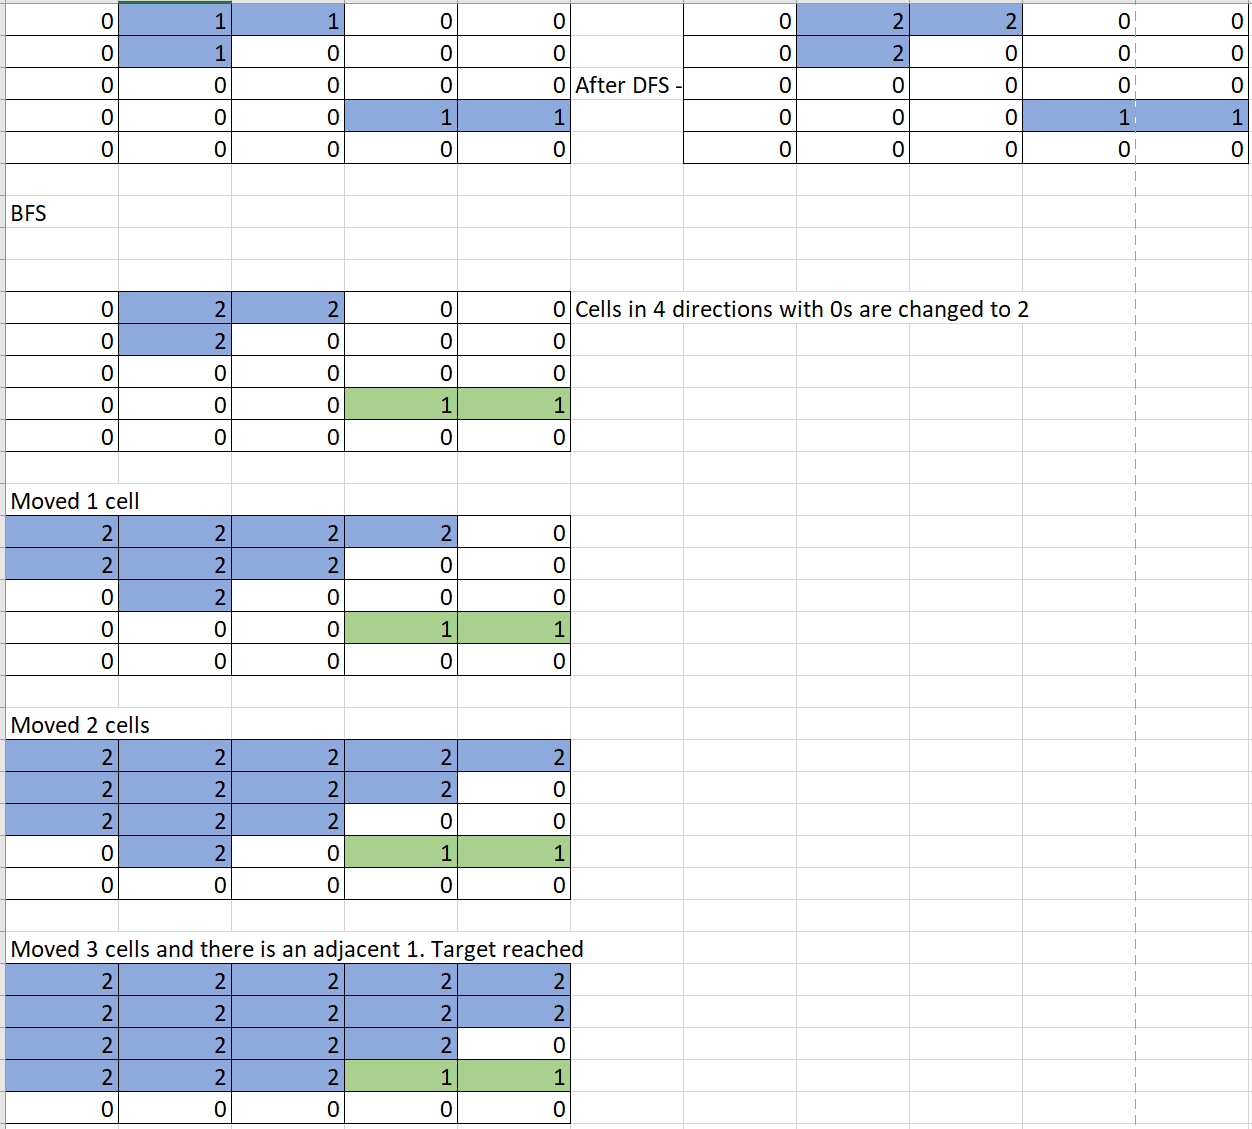

In [ ]:
class Solution:
    def shortestBridge(self, A: List[List[int]]) -> int:
        
        '''
        DFS + BFS
        In DFS, store the positions of the first island
        So we have a list of starting states and are end state would be any (i,j) with a 1 (second island)
        
        Using BFS we can find the shortest path between a start state and an end state
        '''
        
        def dfs(A, i,j):
            
            if i < 0 or i >= len(A) or j < 0 or j >= len(A[0]) or A[i][j] != 1:
                return
            
            A[i][j] = 2
            self.pos.append((i,j))
            for x,y in directions:
                dfs(A, i+x, j+y)
            return self.pos 
        
        self.pos = collections.deque()
        
        
        directions = [[0,1],[0,-1],[1,0],[-1,0]]
        flag = False
        for i in range(len(A)):
            for j in range(len(A[0])):
                if A[i][j] == 1:
                    start_states = dfs(A,i,j)
                    flag = True
                    break
            if flag:
                break
                
        r = len(A)
        c = len(A[0])
        
        shortest_bridge = 0
        '''
        BFS for shortest path 
        
        '''
        while start_states:
        
            
            # for each start state check 4 directions for a 1
            for _ in range(len(start_states)):
                i,j = start_states.popleft()
                
                for x,y in directions:
                    if i+x < 0 or i+x >= r or j+y < 0 or j+y >= c or A[i+x][j+y] == 2:
                        continue
                    # reached an island
                    if A[i+x][j+y] == 1:
                        return shortest_bridge
                    
                    # adding all newly visited cells with 0s
                    start_states.append((i+x,j+y))
                    # changing its value to not visit again
                    A[i+x][j+y] = 2
            # increment as we have moved 1 cell in all directions
            shortest_bridge += 1
            
        return -1

### [As far from land as possible](https://leetcode.com/problems/as-far-from-land-as-possible/)

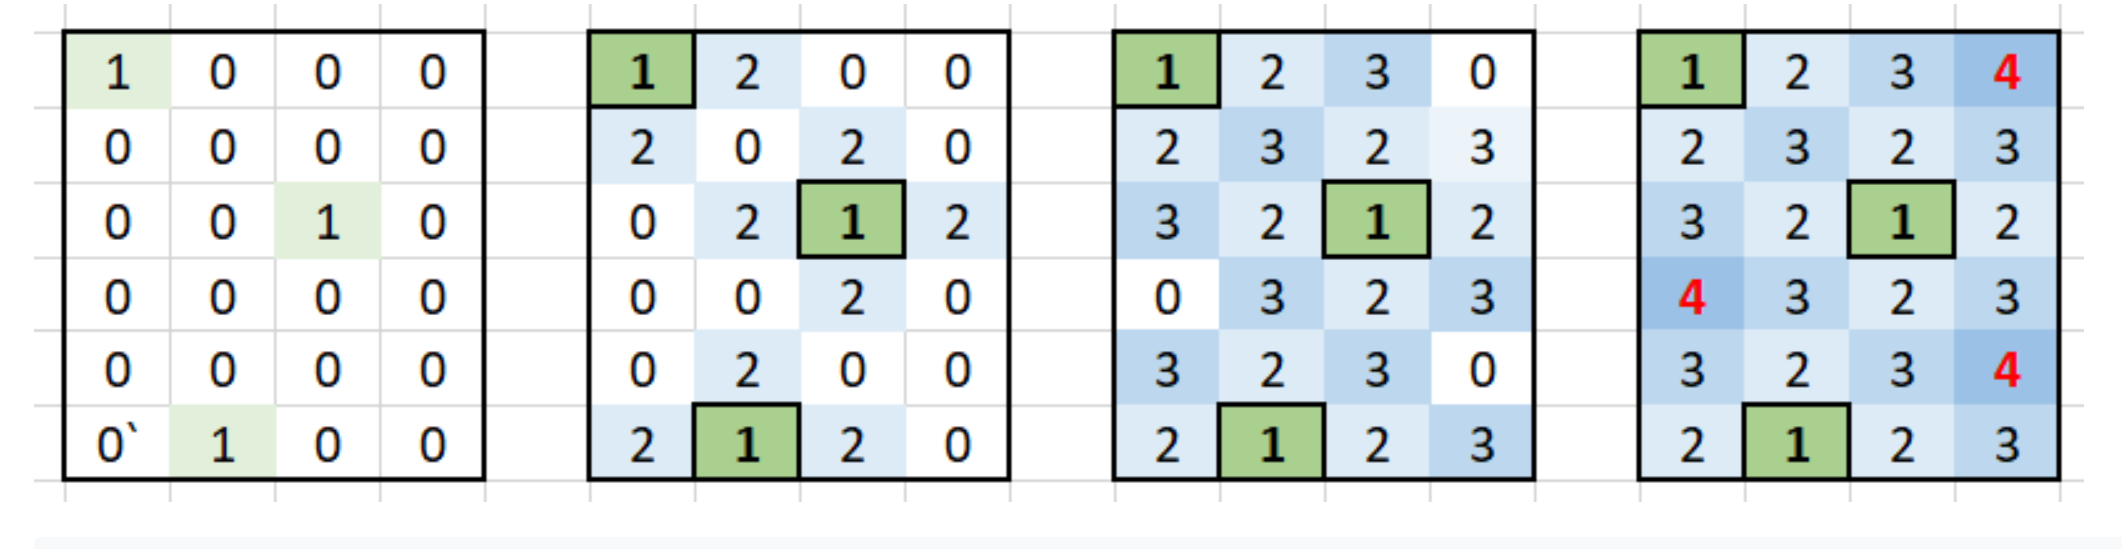

In [ ]:
class Solution:
    def maxDistance(self, grid: List[List[int]]):
        directions = [[0, 1], [0, -1], [-1, 0], [1, 0]]
        r = len(grid)
        c = len(grid[0])

        # store the land positions
        land = collections.deque([(i, j) for i in range(r) for j in range(c) if grid[i][j] == 1])
        
        if len(land) == r * c or len(land) == 0: return -1  # No water or no land
        
        dist = 0

        while land:
        
            for _ in range(len(land)):
                i, j = land.popleft()

                for x, y in directions:
                    if (0 <= i + x < r and 0 <= j + y < c and grid[i + x][j + y] == 0):

                        grid[i + x][j + y] = 1
                        land.append((i + x, j + y))

            dist += 1
        return dist - 1

### [Walls and gates](https://leetcode.com/problems/walls-and-gates)

In [ ]:
class Solution:
    def wallsAndGates(self, rooms: List[List[int]]):
        """
        Do not return anything, modify rooms in-place instead.
        """
        '''
        Start state: Gate
        End state: Empty room
        BFs
        '''
        if not rooms: return
        r = len(rooms)
        c = len(rooms[0])
        queue = collections.deque([(i, j) for i in range(r) for j in range(c)
                                   if rooms[i][j] == 0])
        print(queue)
        directions = [[0, 1], [0, -1], [1, 0], [-1, 0]]
        while queue:

            for _ in range(len(queue)):
                i, j = queue.popleft()

                for x, y in directions:
                    p, q = i + x, j + y
                    if 0 <= p < r and 0 <= q < c and (rooms[p][q] != -1 and rooms[p][q] != 0):

                        if rooms[p][q] == 2147483647:
                            rooms[p][q] = rooms[i][j] + 1
                            queue.append((p, q))

### [The Maze](https://leetcode.com/problems/the-maze)

In [ ]:
'''
Approach: BFS 

Observation: The ball rolls over till it hits a wall. 
'''
class Solution:
    def hasPath(self, maze: List[List[int]], start: List[int], destination: List[int]):
        queue = collections.deque()
        
        queue.append((start[0], start[1]))
        found = False
        maze[start[0]][start[1]] = 2
        directions = [[0,1],[1,0],[-1,0],[0,-1]]
        while queue:
            
            i, j = queue.popleft()
            

            if i == destination[0] and j == destination[1]:
                return True

            for x,y in directions:
                r, c = i+x, j+y

                while 0<= r < len(maze) and 0 <= c < len(maze[0]) and maze[r][c] != 1:
                    r += x
                    c += y
                r -= x
                c -= y
                if maze[r][c] == 0:    
                    queue.append((r,c))
                    maze[r][c] = 2
                
        return False
                

### [Maze 2](https://leetcode.com/problems/the-maze-ii)

In [ ]:
'''
Approach: 
Similar to #490. The Maze
Keep note of the distance

Case: From point A to B the distance is 6 and from point C to B the distance is 5 and some part of the path (C->B) matches 
with the path (A->B) then instead of just checking if the cell is visited or not we have to check if the distance from the new path
is less than the prev path. 

TC: O(MN * max(M,N))
'''
class Solution:
    def shortestDistance(self, maze: List[List[int]], start: List[int], destination: List[int]):
        queue = collections.deque()
        
        queue.append((start[0], start[1],0))    
        directions = [[0,1],[1,0],[-1,0],[0,-1]]
        path = 0
        res =[]
        visited = collections.defaultdict(int)
        visited[(start[0], start[1])] = 0 
        shortest_dist = float('inf')
        while queue:

            i, j, dist = queue.popleft()
            if i == destination[0] and j == destination[1]:
                shortest_dist = min(shortest_dist, dist)

            # roll the ball in one direction until it reaches a wall (1)
            for x,y in directions:
                r, c = i+x, j+y
                dist_new = dist
                while 0<= r< len(maze) and 0 <= c < len(maze[0]) and maze[r][c] != 1:
                    dist_new += 1
                    r += x
                    c += y
                # roll back 
                r -= x
                c -= y

                # add it to visited and if a path to this cell has a distance greater than the current path distance.
                if (r,c) not in visited or (r,c) in visited and visited[(r,c)] > dist_new:    
                    # add the cell to the queue
                    queue.append((r,c, dist_new))
                    # update the distance 
                    visited[(r,c)] = dist_new
             
        return shortest_dist if shortest_dist != float('inf') else -1

## Cycle detection

### Detect a cycle in a directed graph

In [ ]:
'''
Idea: Exploring and explored. 

'''
def hasCycle(node, exploring, explored):

    if node in exploring:
        return True
    if node in explored:
        return False

    exploring.add(node)
    # Its neighbors
    for nei in self.graph[node]:
        if hasCycle(nei, exploring, explored):
            return True

    explored.add(node)
    exploring.remove(node)
    return False

### Detect a cycle in an undirected graph

In [6]:
from collections import defaultdict
class Graph:
    def __init__(self):
        self.graph = defaultdict(list)

    def addEdge(self,u,v):
        self.graph[u].append(v)
        self.graph[v].append(u)

    def hasCycle(self, node):
        visited = set()

        print(self.isCycle(node, visited, -1))

    def isCycle(self,node, visited, parent):

        visited.add(node)
        for nodenext in self.graph[node]:
            if(nodenext!=parent):
                if nodenext in visited:
                    return True
                if self.isCycle(nodenext,visited, node):
                    return True
        return False



g = Graph()
g.addEdge(1, 2)
g.addEdge(2, 3)
g.addEdge(3, 4)
g.addEdge(4, 5)
g.addEdge(5, 2)
g.hasCycle(1)


True


## Topological sort

In [2]:
'''
1. a vertex is pushed to stack only when all of its adjacent vertices
(and their adjacent vertices and so on) are already in stack.


Time complexity: O(V+E)
Space complexity: O(V)

Algorithm:
1. Visit one vertex and then recursively visit its neighbors
2. Push the neighbor which has no more neighbors into the stack
3. Do it for all vertices

'''
from collections import defaultdict

class Graph:
    def __init__(self, vertices):
        self.graph = defaultdict(list)
        self.V = vertices

    def addEdge(self, u,v):
        self.graph[u].append(v)


    def topologicalUtil(self,v,visited,result):
        # set vertex as visited
        visited.add(v)

        # look for its adjacent vertices
        for i in self.graph[v]:
            if i not in visited :
                self.topologicalUtil(i,visited,result)

        result.insert(0,v)


    def topological_sort(self):
        visited = set()
        result = []
#         print(self.graph)
        for i in range(self.V):
            if i not in visited:
                self.topologicalUtil(i,visited, result)
        print(result)

g= Graph(6)
g.addEdge(5, 2);
g.addEdge(5, 0);
g.addEdge(4, 0);
g.addEdge(4, 1);
g.addEdge(2, 3);
# g.addEdge(3, 1);


g.topological_sort()


[5, 4, 2, 3, 1, 0]


### [Course schedule](https://leetcode.com/problems/course-schedule/)

In [ ]:
'''
Approach:

Time complexity: O(V+E)
Space complexity: O(V+E)

Algorithm:
1. Check for cycle in the directed graph
In degree concept (BFS)
'''

from collections import defaultdict
class Solution:
    def canFinish(self, numCourses: int, prerequisites: List[List[int]]) -> bool:
       
        # prerequisites is the [u,v] (edges)

        # detect a cycle in the graph
        # initialize every node's indegree to 0
        indegree = [0] * numCourses
        
        graph = defaultdict(list)

        # create adjacency list
        for pr in prerequisites:
            graph[pr[1]].append(pr[0])
            # as there is an edge into pr[0] its indegree is incremented. 
            indegree[pr[0]] += 1

        '''
        BFS 
        Add node to the queue only when its indegree is 0
        1. Pop nodes with indegree 0 and decrement its neighbors indegree.
        example: 1 -> 2 -> 3 
        indegree of node 1 is 0
        pop: removing the edge 1 -> 2 so indegree of 2 is decremented. 
        '''
        queue = []

        for vertex in range(len(indegree)):
            if indegree[vertex] == 0:
                queue.append(vertex)

        count = 0

        while queue:
            
            course = queue.pop(0)

            # check for popped vertex neighbors and decrement their indegree
            for nei in graph[course]:
                indegree[nei] -= 1

                if indegree[nei] == 0:
                    queue.append(nei)

            count += 1
        # if number of nodes popped equal to num of courses then no cycle. 
        return count == numCourses


In [ ]:
'''
Idea: DFS with cycle detection in a directed graph. 

Cycle detection: 
1. If a node is in exploring state and the node is revisted then there is a cycle. 
2. If a node is in explored state and node is revisted means there is no cycle as all its neighbors are visited. 
TC: O(V+E) as we visit every vertex and edge. 
SC: O(V+E) for graph 
'''
import collections
class Solution:
    def canFinish(self, numCourses: int, prerequisites: List[List[int]]) -> bool:
        def hasCycle(node, exploring, explored):
            
            if node in exploring:
                return True
            if node in explored:
                return False
            
            exploring.add(node)
            # Its neighbors
            for nei in self.graph[node]:
                if hasCycle(nei, exploring, explored):
                    return True
                
            explored.add(node)
            exploring.remove(node)
            return False
        
        # create a graph
        self.graph = collections.defaultdict(list)
        for course_1, course_2 in prerequisites:
            # directed graph
            self.graph[course_1].append(course_2)
            
        
        explored = set()
        exploring = set()
        for node in list(self.graph):
            if hasCycle(node, exploring, explored):
                return False
        return True
                

### [Course schedule 2](https://leetcode.com/problems/course-schedule-ii/)

In [ ]:
'''
Approach: Topological sort

Time complexity: O(V+E)
Space complexity: O(V)



'''

from collections import defaultdict
class Solution:
    def findOrder(self, numCourses: int, prerequisites: List[List[int]]) -> List:
        # num of courses = num of vertices
        # prerequisites is the [u,v] (edges)

        # detect a cycle in the graph
        indegree = [0] * numCourses
        graph = defaultdict(list)
        result = []
        # create adjacency list
        for pr in prerequisites:
            # pr[1] = vertex
            # pr[0] = adj vertex
            graph[pr[1]].append(pr[0])
            indegree[pr[0]] += 1

        # push only those vertices whose indegree is 0
        queue = []

        for vertex in range(len(indegree)):
            # if indegree[i] is 0, add to queue
            if indegree[vertex] == 0:
                queue.append(vertex)

        count = 0

        while queue:
            # pop
            v = queue.pop(0)
            result.append(v)
            # check for popped vertex neighbors and decrement their indegree
            for n in graph[v]:
                indegree[n] -= 1

                if indegree[n] == 0:
                    queue.append(n)

            # as we visited a node
            count += 1
        #print(result)
        return result if count == numCourses else []


In [ ]:
'''
APPROACH : GRAPH / DFS
Similar to 207. COURSE SCHEDULE
'''
        
class Solution:
    def findOrder(self, numCourses: int, prerequisites: List[List[int]]) -> List[int]:
           
        
        # DETECT CYCLE IN DIRECTED GRAPH.        
        def isCycle(node, graph, exploring, explored):
            
            if(node in exploring): # Cycle detected. If you are still exploring and found the same element again in exploring.
                return True
            
            if(node in explored):                       
                return False
            
            exploring.add(node)                         # mark this node as visited.
            for currNode in graph[node]:                # visit all children of this node.
                if(isCycle(currNode, graph, exploring, explored)):
                    return True                        # if one of its childs returns, its already visited
            
            explored.append(node)    
            exploring.remove(node)
            return False
            
        graph = collections.defaultdict(list)           
        for i in range(numCourses):                     
            graph[i] = []
            
        for item in prerequisites:
            graph[item[1]].append(item[0])
        
        explored = []                                    # To keep track of explored nodes in the graph
        exploring = set()                                # still in exploring, not yet finished.
        
        for node in list(graph):                         # watch out => list(graph)
            if(node not in explored):
                if(isCycle(node, graph, exploring, explored)):
                    return []                            # cycle found.
                    
                else:
                    if(len(explored) == numCourses):
                        return explored[::-1]
        return explored[::-1]

## Medium problems

### [Clone graph](https://leetcode.com/problems/clone-graph/)

In [ ]:
'''
Approach: BFS.
Store node: clone node in a hashmap
Update the adjacency list of each cloned node using the original node's adjacency list. 

'''

class Solution:
    def cloneGraph(self, node: 'Node') -> 'Node':
        # BFS
        if not node:
            return

        def BFS(node):
            visited = set()
            queue = collections.deque()
            # add node to the queue
            queue.append(node)
            # update visited
            visited.add(node)
            while queue:
                node = queue.popleft()

                # clone the node
                clone_node = Node()
                clone_node.val = node.val
                hashmap[node] = clone_node

                for nei in node.neighbors:
                    if nei not in visited:
                        visited.add(nei)
                        queue.append(nei)

        hashmap = {}
        BFS(node)
        for key, val in hashmap.items():
            for nei in key.neighbors:
                c_node = hashmap[nei]
                val.neighbors.append(c_node)

        return hashmap[node]

### [All Paths From Source to Target](https://leetcode.com/problems/all-paths-from-source-to-target/)

In [ ]:
class Solution:
    def allPathsSourceTarget(self, graph: List[List[int]]) -> List[List[int]]:
        def dfs(node, visited, path, all_paths):

            path.append(node)

            visited.add(node)
            if node == len(graph)-1:
                all_paths.append(list(path))

            for nei in graph[node]:
                if nei not in visited:
                    dfs(nei, visited, path, all_paths)
            # backtrack
            path.pop()
            visited.remove(node)
        visited = set()
        all_paths = []
        dfs(0, visited, [], all_paths)
        
        return all_paths

### [Reconstruct itinerary](https://leetcode.com/problems/reconstruct-itinerary/)

In [ ]:
'''
Approach: 

Time complexity: O(E/2 * log E/2)
Space complexity: O(V + 2E)

Algorithm:
1. Sort the neighbors of the graph in reverse order
2. Pop the neighbor and do DFS
3. Add the node to the result when its neighbor list is empty
4. Reverse the result list
'''
class Solution:
    def findItinerary(self, tickets: List[List[str]]) -> List[str]:
        from collections import defaultdict
        self.flightMap = defaultdict(list)

        for ticket in tickets:
            origin, dest = ticket[0], ticket[1]
            self.flightMap[origin].append(dest)

        for origin, itinerary in self.flightMap.items():
        # Note that we could have multiple identical flights, i.e. same origin and destination.
            itinerary.sort(reverse=True)


        self.result = []
        self.DFS('JFK')

        return self.result[::-1]

    def DFS(self, origin):
        destlist = self.flightMap[origin]
        while destlist:
            nextDest = destlist.pop()
            self.DFS(nextDest)

        self.result.append(origin)

        
'''
Follow up: How do u select the starting airport? 
Ans: Indegree of the airport which is 0
'''

### [Evaluate division](https://leetcode.com/problems/evaluate-division/)

In [ ]:
'''
Approach: DFS
1. store all edges (bidirectional) with values.
2. start from query[0] and go along edges till you reach query[1] (keep track of ans )
3. make sure to prevent cycles using visited
4. EDGE CASE : query [x2,x4] ideal path should be x2 -> x3 -> x4, 
but as we are checking for all items in graph[curr] our path will be x2->x1->x2->x3->x4 but as we keeping track of visited,
our path will be x2->x1->x3->x4 which is wrong,
so we have to discard the prodcut ans = ans * item[1] by doing ans = ans / item[1]
when the path we are travelling returned false and also delete the node from visited list
'''


class Solution:
    def calcEquation(self, equations: List[List[str]], values: List[float],
                     queries: List[List[str]]) -> List[float]:
        if len(equations) == 0:
            return

        def dfs(node, end_node, val, visited):
            if node == end_node and end_node in graph:
                self.res.append(val)
                return True

            for nei in graph[node]:
                if nei[0] not in visited:
                    val = val * nei[1]
                    visited.add(nei[0])
                    if dfs(nei[0], end_node, val, visited):
                        return True
                    else:
                        visited.remove(nei[0])  # edge case
                        val = val / nei[1]
            return False

        # Build graph
        graph = collections.defaultdict(list)
        for node, val in zip(equations, values):
            graph[node[0]].append((node[1], val))
            graph[node[1]].append((node[0], 1 / val))
        

        self.res = []

        for start, end in queries:
            visited = set()
            visited.add(start)
            val = 1
            if not dfs(start, end, val, visited):
                self.res.append(-1)
        return self.res

### [Is graph bipartite](https://leetcode.com/problems/is-graph-bipartite/)

In [ ]:
class Solution:
    def isBipartite(self, graph: List[List[int]]) -> bool:
        # graph coloring
        def BFS(node):
            queue = []
            
            color[node] = 0
            queue.append(node)
            while queue:
                n = queue.pop(0)
                c = color[n]
                for nei in graph_struct[n]:
                
                    if color[nei] == c:
                        return False
                    if color[nei] == -1 and color[nei] != c:
                        queue.append(nei)
                        color[nei] = 1-c
            return True
                        
                        
        graph_struct = collections.defaultdict()
        color = {}
        
        for i in range(len(graph)):
            graph_struct[i] = graph[i]
            color[i] = -1
        
        vertices = list(graph_struct.keys())
        start_node = 0
        
        # edge case if first node has no adjacent nodes
        for i in range(len(vertices)):
            
            if color[i] == -1:
                if not BFS(i):
                    return False
                
        return True 

### [Graph valid tree](https://leetcode.com/problems/graph-valid-tree)

In [ ]:
'''
For a graph to be a tree there must not be a cycle and no disconnected components. 
'''
class Solution:
    def validTree(self, n: int, edges: List[List[int]]) -> bool:
        self.graph = collections.defaultdict(list)

        for e in edges:
            self.graph[e[0]].append(e[1])
            self.graph[e[1]].append(e[0])

        visited = set()
        # if cycle then not a tree
        if self.hasCycle(0, visited, -1): # cycle detection
            return False
        # if all nodes are not connected (check for disconnected components.)
        if len(visited) != n:
            return False
        return True
    
    # undirected cycle detection
    def hasCycle(self, node, visited, parent):

        visited.add(node)
        for neighbor in self.graph[node]:
            if neighbor not in visited:
                if self.hasCycle(neighbor, visited, node):
                    return True
            elif parent != neighbor:
                return True
        return False

### [path-with-maximum-minimum-value](https://leetcode.com/problems/path-with-maximum-minimum-value)

In [ ]:
'''
Time: O(MN log MN)
space: O(MN)
'''

class Solution:
    def maximumMinimumPath(self, A: List[List[int]]) -> int:
        
        row = len(A)
        col = len(A[0])

        maxheap = []
        heappush(maxheap, (-A[0][0], 0, 0))

        visited = set()

        directions = [[0, 1], [1, 0], [0, -1], [-1, 0]]

        while maxheap:
            val, i, j = heapq.heappop(maxheap)
            if i == row - 1 and j == col - 1:
                return -val
            for x, y in directions:
                if i + x >= 0 and i + x < row and j + y >= 0 and j + y < col and (i+x, j+y) not in visited:
                    visited.add((i + x,j + y))
                    heapq.heappush(maxheap,(max(val, -A[i + x][j + y]), i + x, j + y))
        return -1

### [number-of-connected-components-in-an-undirected-graph](https://leetcode.com/problems/number-of-connected-components-in-an-undirected-graph)

In [ ]:
'''
Approach: DFS and count them
'''
class Solution:
    def countComponents(self, n: int, edges: List[List[int]]) -> int:
        graph = collections.defaultdict(list)
        for u, v in edges:
            graph[u].append(v)
            graph[v].append(u)

        def dfs(node, visited):
            visited.add(node)

            for nei in graph[node]:
                if nei not in visited:
                    dfs(nei, visited)

        count = 0
        visited = set()
        for i in range(n):
            if i not in visited:
                dfs(i, visited)
                count += 1

        return count

### [Cheapest flights with k stops](https://leetcode.com/problems/cheapest-flights-within-k-stops)

In [ ]:

'''
Dijkstra's algorithm


Directed graph 

Algorithm: Priority Queue to get the path with minimum cost. 
TC: O(V + ElogV) ; ElogV for minheap
SC: O(V+E)
'''

class Solution:
    def findCheapestPrice(self, n: int, flights: List[List[int]], src: int, dst: int, K: int):
    
        graph = collections.defaultdict(dict)
        
        for city1, city2, cost in flights:
            graph[city1][city2] = cost
            
        print(graph)
        minheap = [(0, src, K)]
        
        while minheap:
            cost, city1, k = heapq.heappop(minheap)
            
            if city1 == dst:
                return cost

            # if the cities are in at most k stops away add them to the heap. 
            # for city 0 there are two neighboring cities so we need to travel to a city with and we have to choose min cost to reach the destination city.

            if k >= 0:
                for nei_city in graph[city1]:
                    nei_cost = graph[city1][nei_city]
                    heapq.heappush(minheap, (cost + nei_cost, nei_city, k-1))
            
            
        return -1
            
        

### [connecting-cities-with-minimum-cost](https://leetcode.com/problems/connecting-cities-with-minimum-cost)

In [ ]:
'''
Similar to #1135. Connecting Cities With Minimum Cost
'''
class Solution:
    def minimumCost(self, N: int, connections: List[List[int]]) -> int:

        graph = collections.defaultdict(list)

        for city1, city2, cost in connections:
            graph[city1].append((cost, city2))
            graph[city2].append((cost, city1))

        queue = [(0, N)]
        visited = set()
        total_cost = 0
        
        # heap to get the min from changing numbers.
        while queue and len(visited) != N:
            cost, city = heapq.heappop(queue)
            
            if city not in visited:
                visited.add(city)
                total_cost += cost

                # add the neighbors to the heap
                for cost, city in graph[city]:
                    heapq.heappush(queue, (cost, city))
                    
        return total_cost if len(visited) == N else -1

## Hard problems

### [Alien dictionary](https://leetcode.com/problems/alien-dictionary)

In [ ]:
'''
Approach: Topological sort + Cycle detection

Chillar edge case: word 1 in the word list is bigger than next word and has word2 as it prefix. 

'''
class Solution:
    def alienOrder(self, words: List[str]):
        def hasCycle(node, exploring, explored):
            if node in exploring:
                return True
            if node in explored:
                return False
            exploring.add(node)
            
            for nei in graph[node]:
                if hasCycle(nei, exploring, explored):
                    return True
            result.appendleft(node)
            explored.add(node)
            exploring.remove(node)
            return False
        
        # create graph=========================
        graph=collections.defaultdict(list)

        x,y=0,1
        while(y<len(words)):
            i=j=0
            word1,word2=words[x],words[y]
            
            # condition for chillar test case 
            if word1.startswith(word2) and len(word1) > len(word2):
                return ""
            
            while(i<len(word1) and j<len(word2)):
                if(word1[i]==word2[j]):
                    i+=1
                    j+=1
                else:
                    graph[word1[i]].append(word2[j])
                    break
            x+=1
            y+=1
        # create nodes in the graph with empty adjacency list
        all_chars=set("".join(words))
        missed_chars = all_chars - set(graph)
        
        for char in missed_chars:
            graph[char]=[]
        
        # =======================================
        exploring = set()
        explored = set()
        result = collections.deque()
        for node in list(graph):
            if hasCycle(node, exploring, explored):
                return ""
        
        return "".join(result)

### [Critical connections](https://leetcode.com/problems/critical-connections-in-a-network)

 **Tarjan's algorithm**
[Video](https://www.youtube.com/watch?v=RYaakWv5m6o)

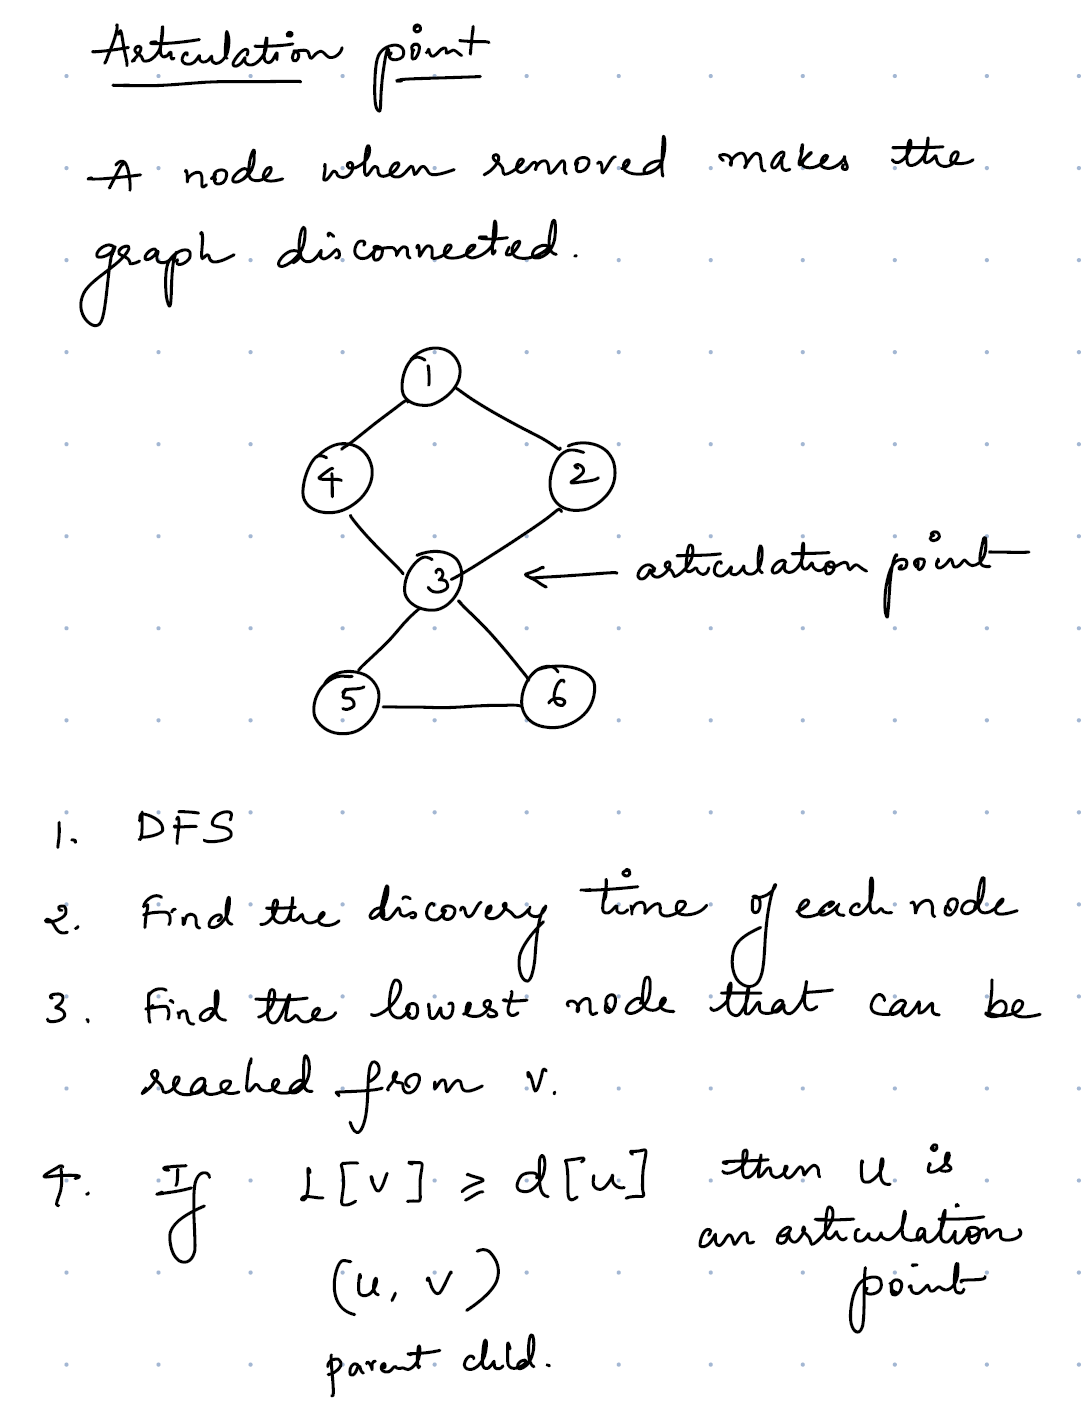

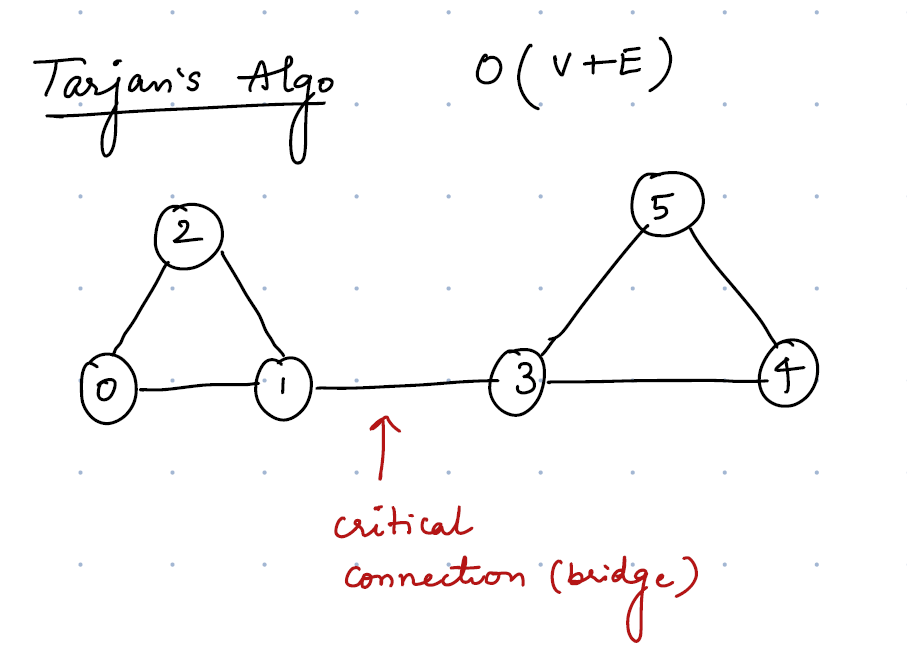

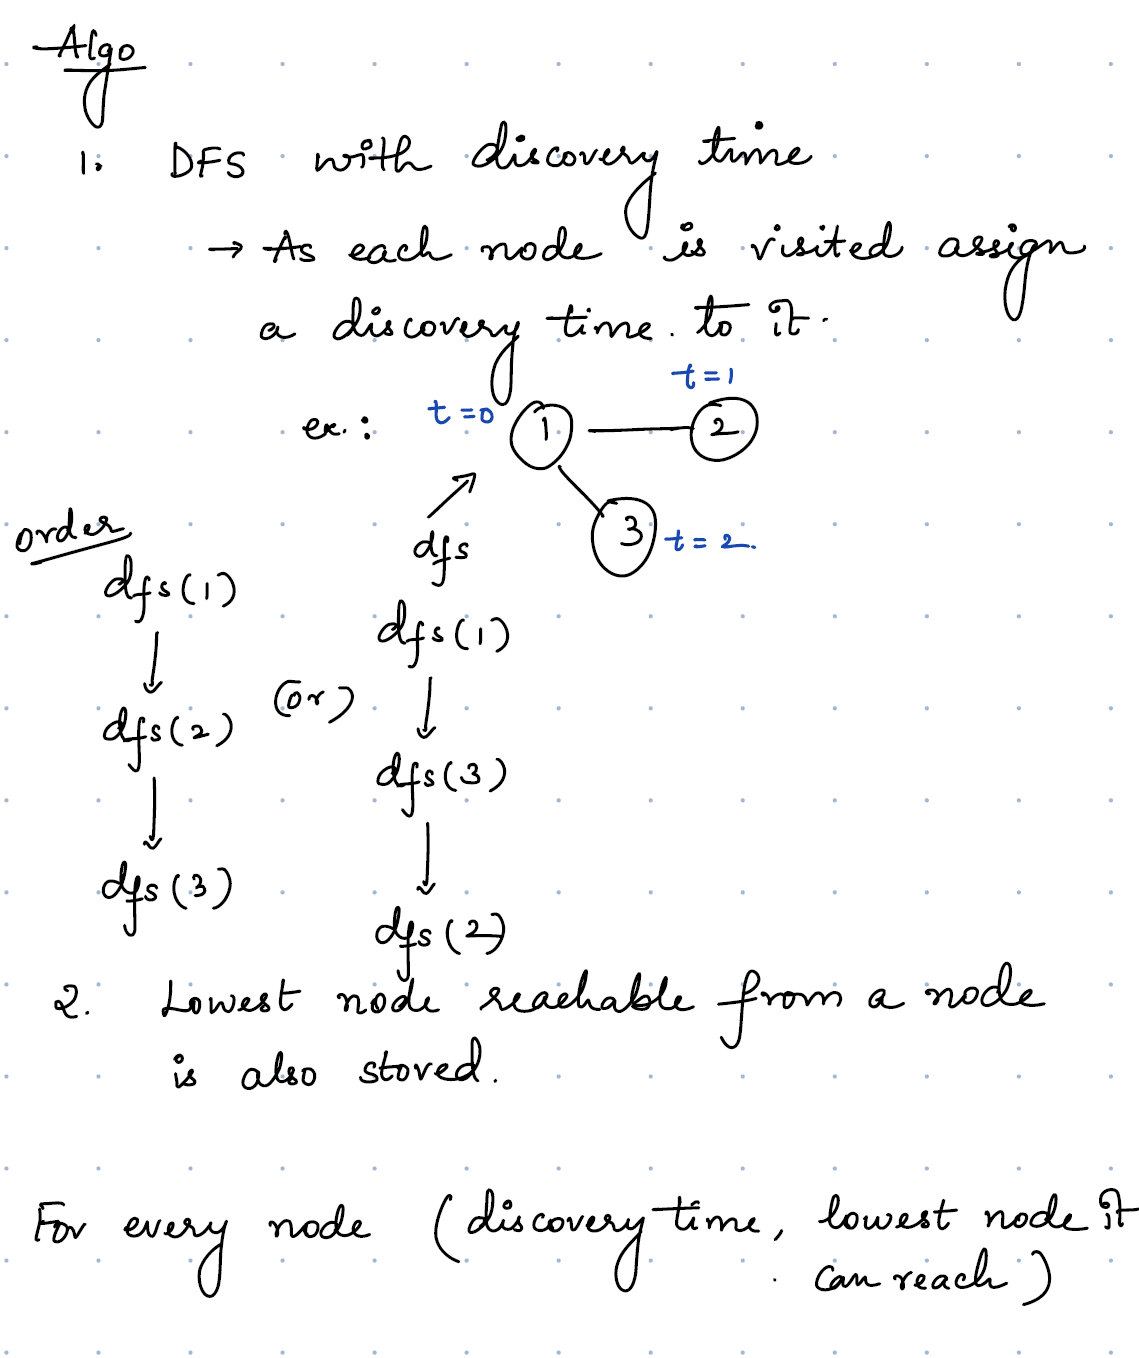

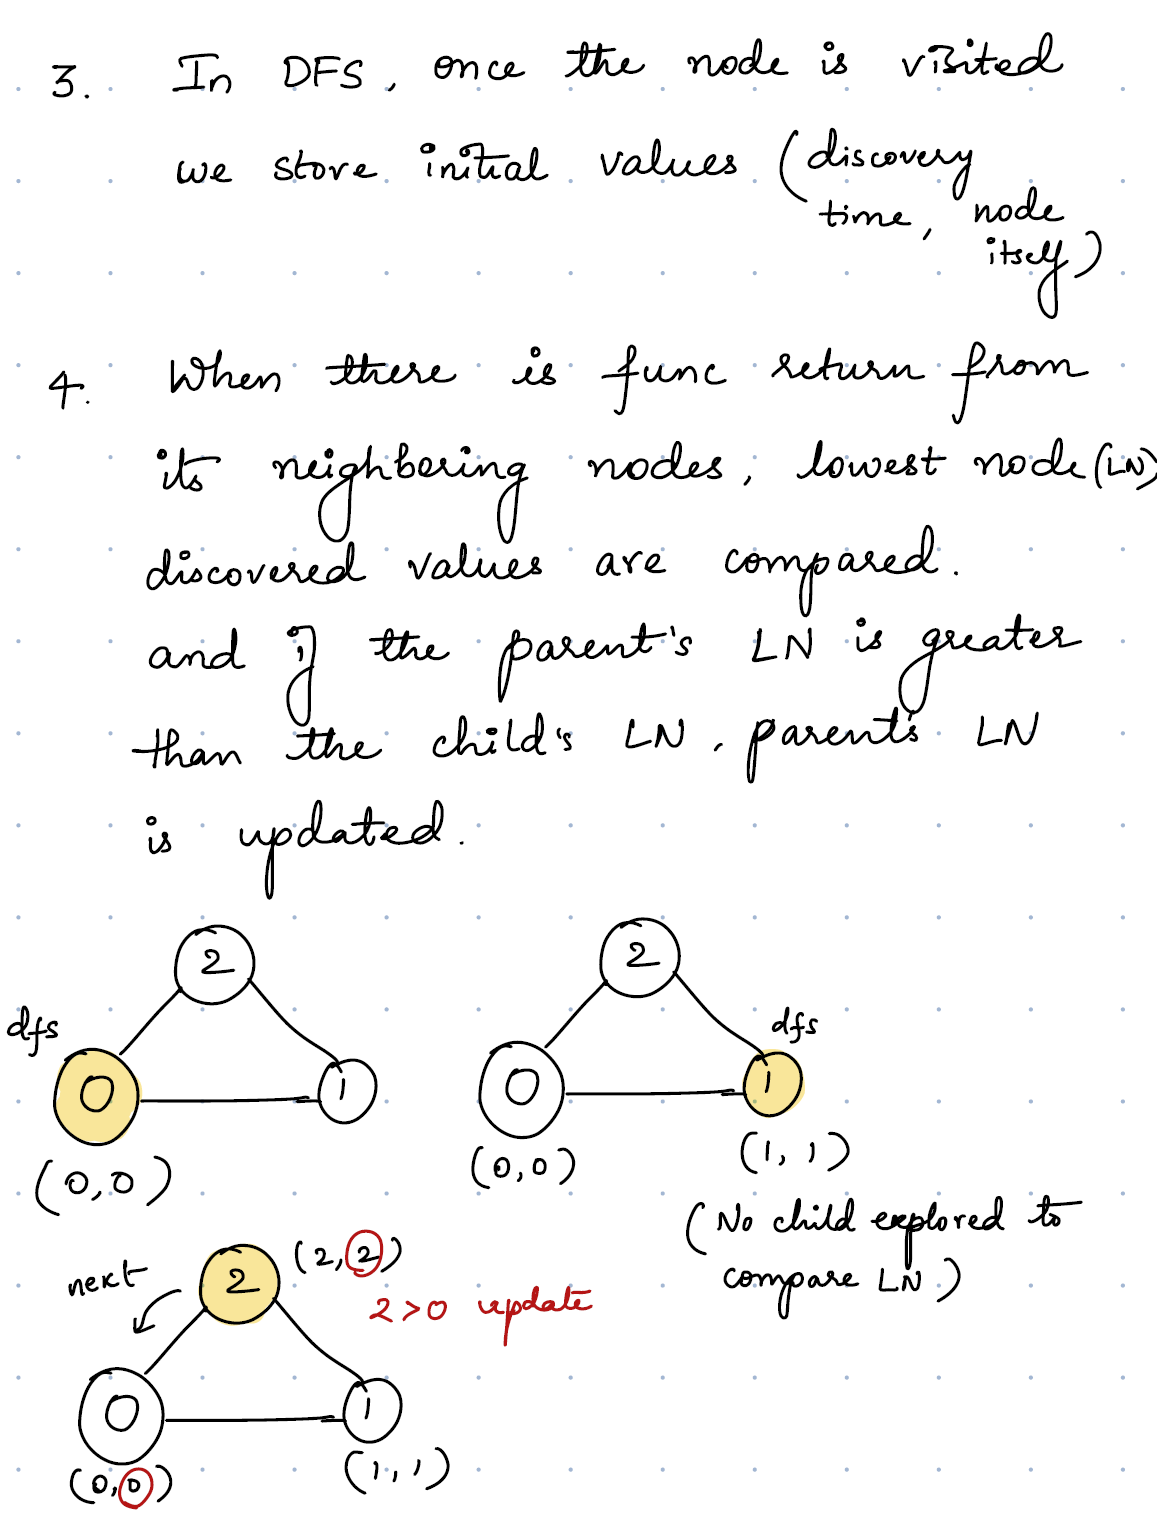

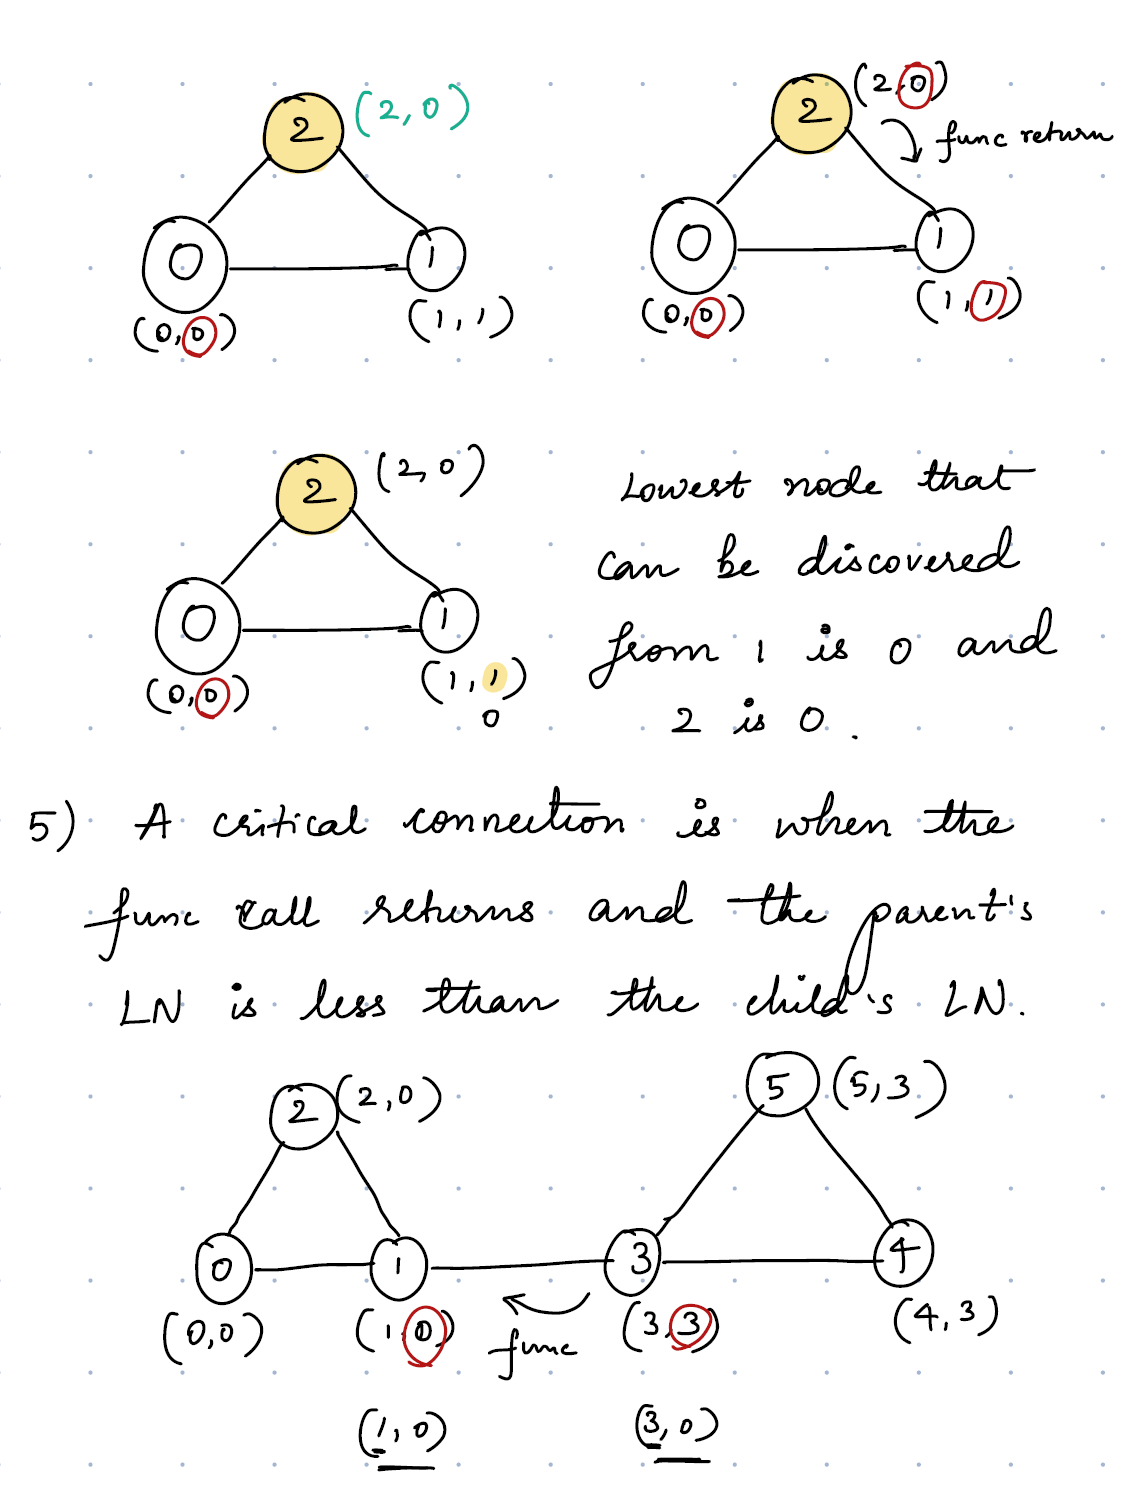

In [ ]:
class Solution:
    def criticalConnections(self, n: int, connections: List[List[int]]) -> List[List[int]]:

        def dfs(node, visited, prev, discovery_time):
            visited.add(node)
            lowest_reachable[node] = discovery_time
            
            for nei in graph[node]:
                # to avoid moving to its parent as the graph is undirected
                if nei == prev:
                    continue
                    
                if nei not in visited:
                    dfs(nei, visited, node, discovery_time + 1)
                
                # update the rank of the node with the lowest value. 
                lowest_reachable[node] = min(lowest_reachable[node], lowest_reachable[nei])
                
                # a critical connection is one when rank of a neighbor is greater than the node's discovery time.  
                if lowest_reachable[nei] >= discovery_time + 1:
                    self.cc.append([node, nei])
                    
        visited = set()
        lowest_reachable = {}
        self.count = 0
        self.cc = []
        graph = collections.defaultdict(list)
        for u,v in connections:
            graph[u].append(v)
            graph[v].append(u)
        
        
        dfs(0, visited, -1, 0)
        
        return self.cc
        